In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

**EfficientFrontier** class can be used for "classic" frontiers where all portfolios are **rebalanced mothly** (single period optimization). It's the most easy and fast way to draw an Efficient Frontier.

### Simple efficient frontier for 2 ETF

In [2]:
ls2 = ['SPY.US', 'BND.US']
curr='USD'
two_assets = ok.EfficientFrontier(symbols=ls2, ccy=curr, n_points=100)  # n_points - specifies a number of points in the Efficient Frontier chart (default is 20)
two_assets

symbols             [SPY.US, BND.US]
currency                         USD
first date                   2007-05
last_date                    2021-03
period length    13 years, 11 months
inflation                   USD.INFL
dtype: object

**ef_points** property returns the dataframe (table).  
Each row has risk and return properties of portfolio which could be used to plot the points of the frontier:  
- _Risk_ - the volatility or standard deviation  
- _Mean return_ - the expectation or arithmetic mean  
- _CAGR_ - Compound annual growth rate

All the properties have annualized values.  
Last columns are the weights for each asset.  

In [3]:
df = two_assets.ef_points
df

,Risk,Mean return,CAGR,BND.US,SPY.US
0,0.038354,0.041169,0.040469,1.000000,0.000000
1,0.038099,0.041831,0.041141,0.989899,0.010101
2,0.037915,0.042494,0.041810,0.979798,0.020202
3,0.037803,0.043157,0.042478,0.969697,0.030303
4,0.037764,0.043820,0.043142,0.959596,0.040404
...,...,...,...,...,...
95,0.164804,0.105833,0.093549,0.040404,0.959596
96,0.166629,0.106533,0.093985,0.030303,0.969697
97,0.168458,0.107233,0.094417,0.020202,0.979798
98,0.170291,0.107934,0.094847,0.010101,0.989899


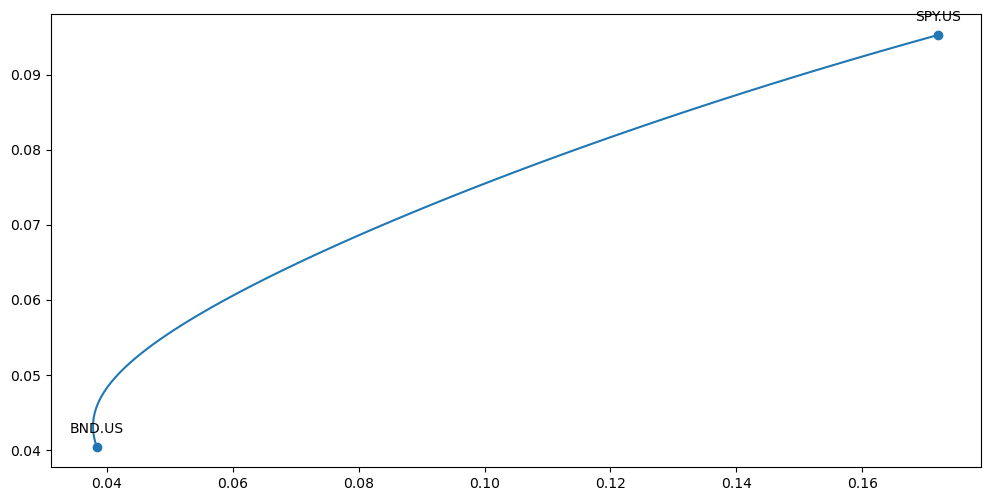

In [4]:
fig = plt.figure()

# Plotting the assets
ok.Plots(ls2, ccy=curr).plot_assets(kind='cagr')
ax = plt.gca()

# Plotting the Efficient Frontier
ax.plot(df['Risk'], df['CAGR']);

It's possible to draw both efficient frontiers: for mean return and for CAGR with the same dataframe.

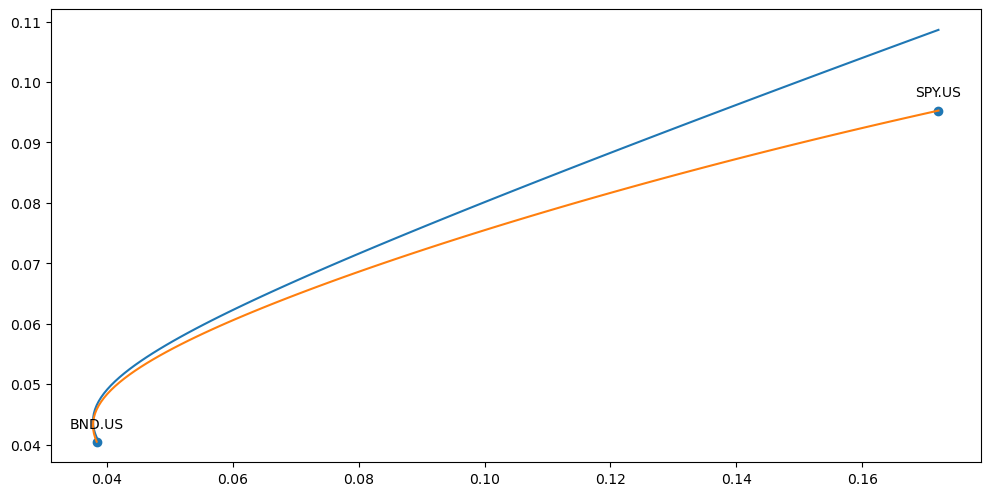

In [5]:
fig = plt.figure()

# Plotting the assets
ok.Plots(ls2, ccy=curr).plot_assets(kind='cagr')
ax = plt.gca()

# Plotting the Efficient Frontiers
# EF with mean return
ax.plot(df['Risk'], df['Mean return'])
# EF with CAGR
ax.plot(df['Risk'], df['CAGR']);

### Several assets

Let's add a popular fisical gold and real estate ETFs...

In [6]:
ls4 = ['SPY.US', 'BND.US', 'GLD.US', 'VNQ.US']
curr = 'USD'
four_assets = ok.EfficientFrontier(symbols=ls4, ccy=curr, n_points=100)
four_assets

symbols          [SPY.US, BND.US, GLD.US, VNQ.US]
currency                                      USD
first date                                2007-05
last_date                                 2021-03
period length                 13 years, 11 months
inflation                                USD.INFL
dtype: object

In [7]:
df4 = four_assets.ef_points

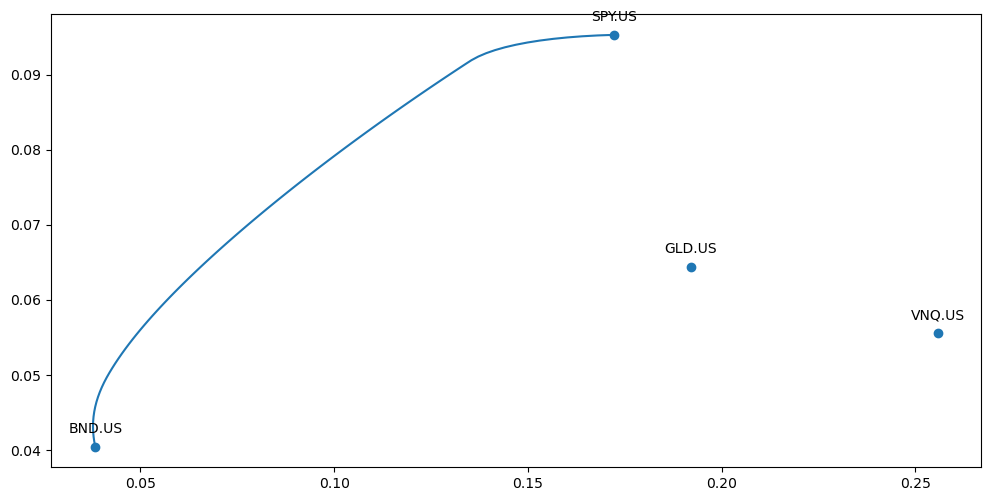

In [8]:
fig = plt.figure()

# Plotting the assets
ok.Plots(ls4, ccy=curr).plot_assets(kind='cagr')
ax = plt.gca()

# Plotting the Efficient Frontier
ax.plot(df4['Risk'], df4['CAGR']);

### Efficient Frontier for each pair of assets

Sometimes it can be helpful to see how each pair of assets "contributes" to the common efficient frontier by drawing all the pair frontiers.

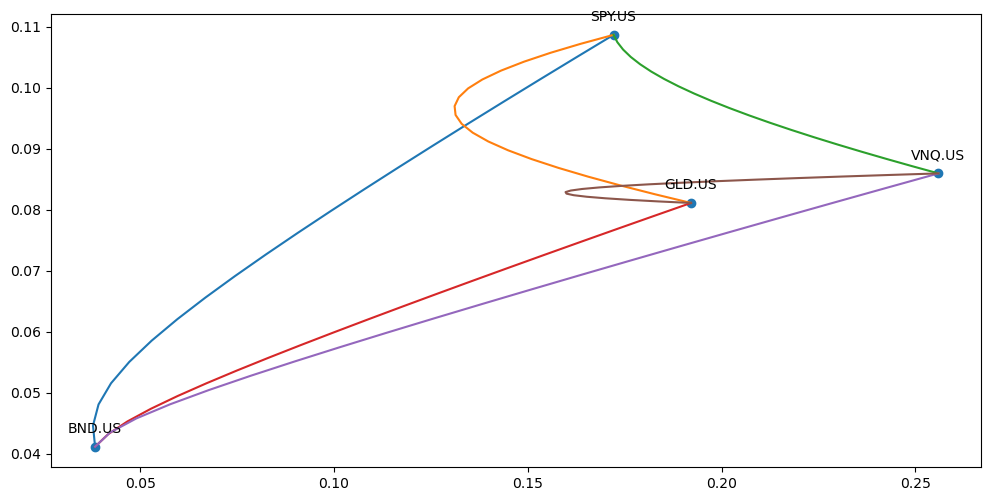

In [9]:
ok.Plots(ls4, ccy=curr).plot_pair_ef();

We can see all efficent frontiers (pairs and 4 assets) in a common chart ...

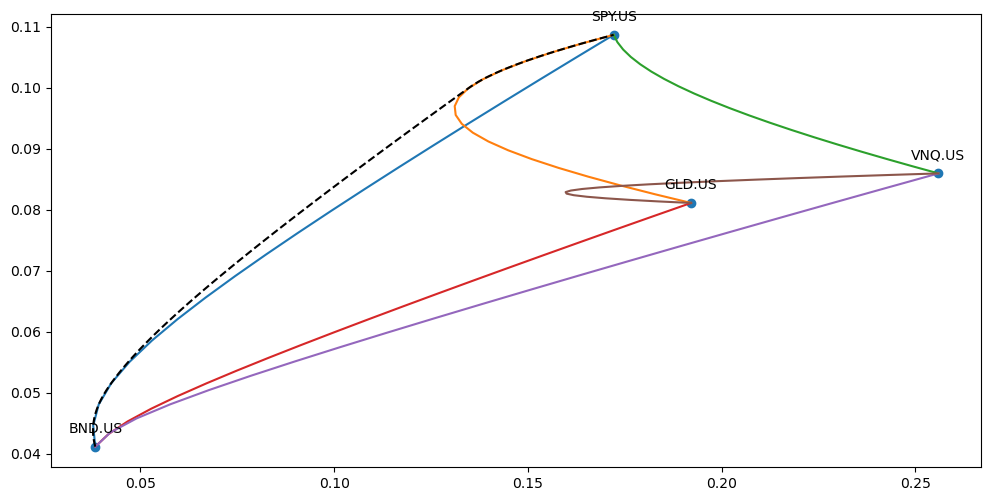

In [10]:
fig = plt.figure()

# Plotting the assets
ok.Plots(ls4, ccy=curr).plot_pair_ef()

ax = plt.gca()

# Plotting the Efficient Frontier
ax.plot(df4['Risk'], df4['Mean return'], color = 'black', linestyle='--');

### Global Minimum Variance (GMV) portfolio

GMV weights and values could be found with **gmv_weights**, **gmv_monthly** and **gmv_annualized** methods.

Weights of GMV portfolio:

In [11]:
four_assets.gmv_weights 

array([4.36033331e-02, 9.56396667e-01, 0.00000000e+00, 6.93889390e-18])

Risk and mean return on monthly basis:

In [12]:
four_assets.gmv_monthly

(0.01047697560817391, 0.003597169639307313)

Risk and mean return annualized:

In [13]:
four_assets.gmv_annualized

(0.03776682084480874, 0.044030374701120145)

With annualized values it's easy to draw the GMV point on the chart.

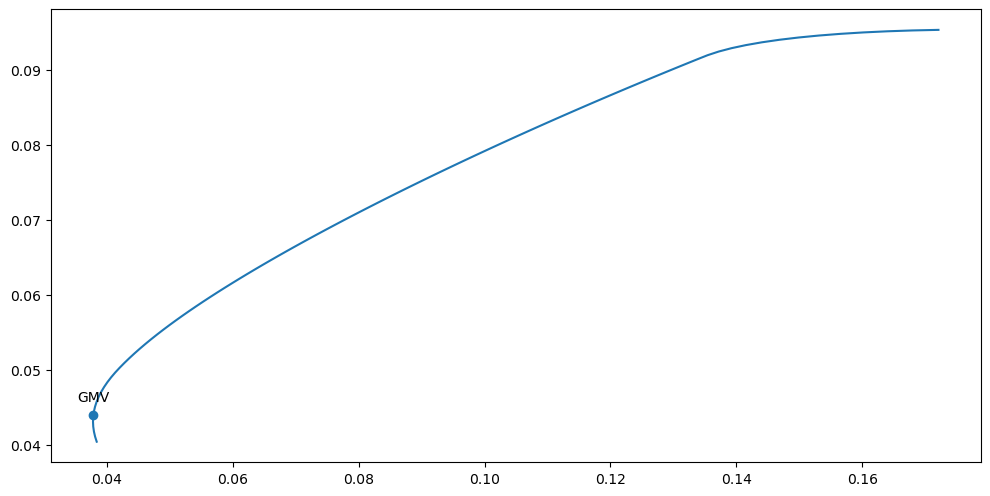

In [14]:
fig = plt.figure()
ax = plt.gca()

# Plotting the Efficient Frontier
ax.plot(df4['Risk'], df4['CAGR']);

# plotting GMV point
ax.scatter(four_assets.gmv_annualized[0], four_assets.gmv_annualized[1])

# annotations for GMV point
ax.annotate("GMV",  # this is the text
            (four_assets.gmv_annualized[0], four_assets.gmv_annualized[1]),  # this is the point to label
            textcoords="offset points",  # how to position the text
            xytext=(0, 10),  # distance from text to points (x,y)
            ha='center');  # horizontal alignment can be left, right or center

### Monte Carlo simulation for efficient frontier

Monte Carlo simulation is useful to visualize portfolios allocation inside the Efficient Frontier. It generates N random weights and calculates their properties (risk and return metrics).

Let's create a list of popular German stocks, add US bonds ETF (AGG) and spot gold prices (GC.COMM). Portfolios currency is EUR.

In [15]:
ls5 = ['DBK.XETR', 'SIE.XETR', 'TKA.XETR', 'AGG.US', 'GC.COMM']
curr = 'EUR'
gr = ok.EfficientFrontier(symbols=ls5, ccy=curr, n_points=100)
gr

symbols          [DBK.XETR, SIE.XETR, TKA.XETR, AGG.US, GC.COMM]
currency                                                     EUR
first date                                               2003-10
last_date                                                2021-03
period length                                 17 years, 6 months
inflation                                               EUR.INFL
dtype: object

In [16]:
gr.names

{'DBK.XETR': 'Deutsche Bank Aktiengesellschaft',
 'SIE.XETR': 'Siemens Aktiengesellschaft',
 'TKA.XETR': 'thyssenkrupp AG',
 'AGG.US': 'iShares Core U.S. Aggregate Bond ETF',
 'GC.COMM': 'Gold'}

To create a "cloud" of random portfolios **get_monte_carlo** method is used.

In [17]:
mc = gr.get_monte_carlo(n=5000, kind='cagr')  # it is possible to choose whether mean return or CAGR is used with "kind" attribute

In [18]:
mc

,CAGR,Risk
0,0.066263,0.137289
1,0.053731,0.195315
2,0.058385,0.144160
3,0.062653,0.181332
4,0.054683,0.167206
...,...,...
4995,0.074015,0.168076
4996,0.067976,0.097059
4997,0.054452,0.185806
4998,0.051583,0.228433


We can plot the random portfolios with matplotlib **scatter** method. To add the assets point to the chart **plot_assets** is used (with Plots class).

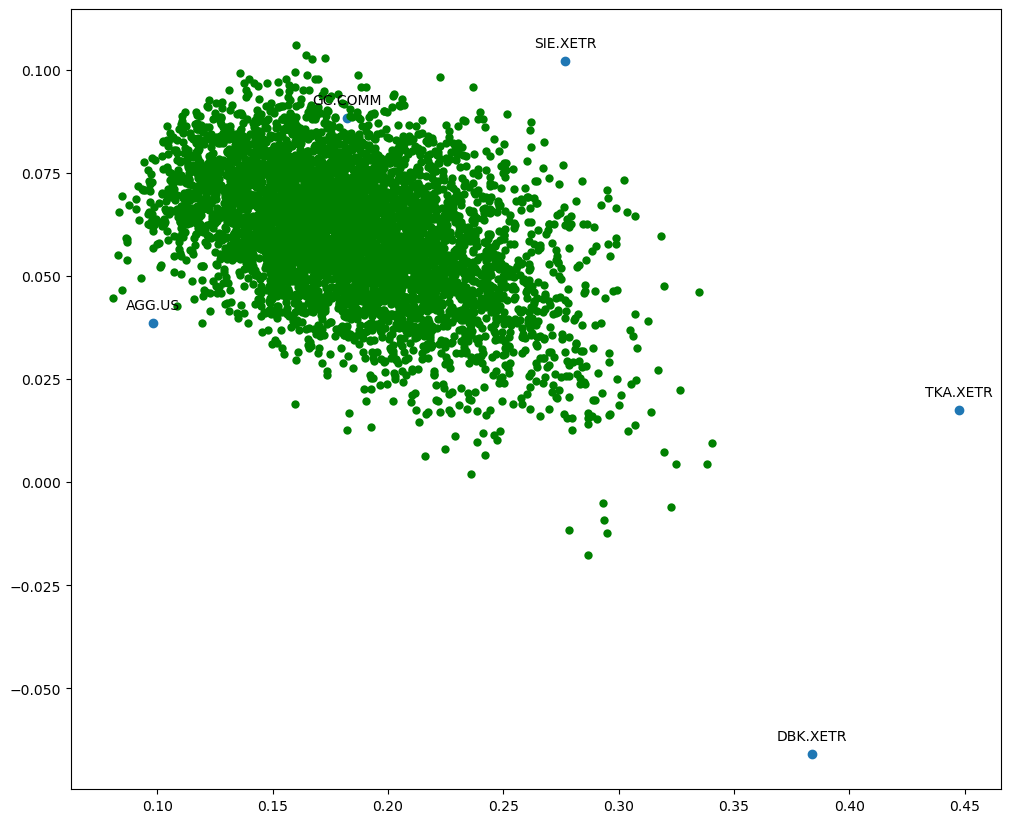

In [19]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
ok.Plots(ls5, ccy='EUR').plot_assets(kind='cagr')  # plot the assets points
ax = plt.gca()

ax.scatter(mc.Risk, mc.CAGR, linewidth=0, color='green');

As the random portfolios "cloud" usually does not have an obvious shape, sometimes it's worth to draw Monte Carlos simulation together with the Efficient Frontier.

In [20]:
ef = gr.ef_points  # calculate Efficient Frontier points

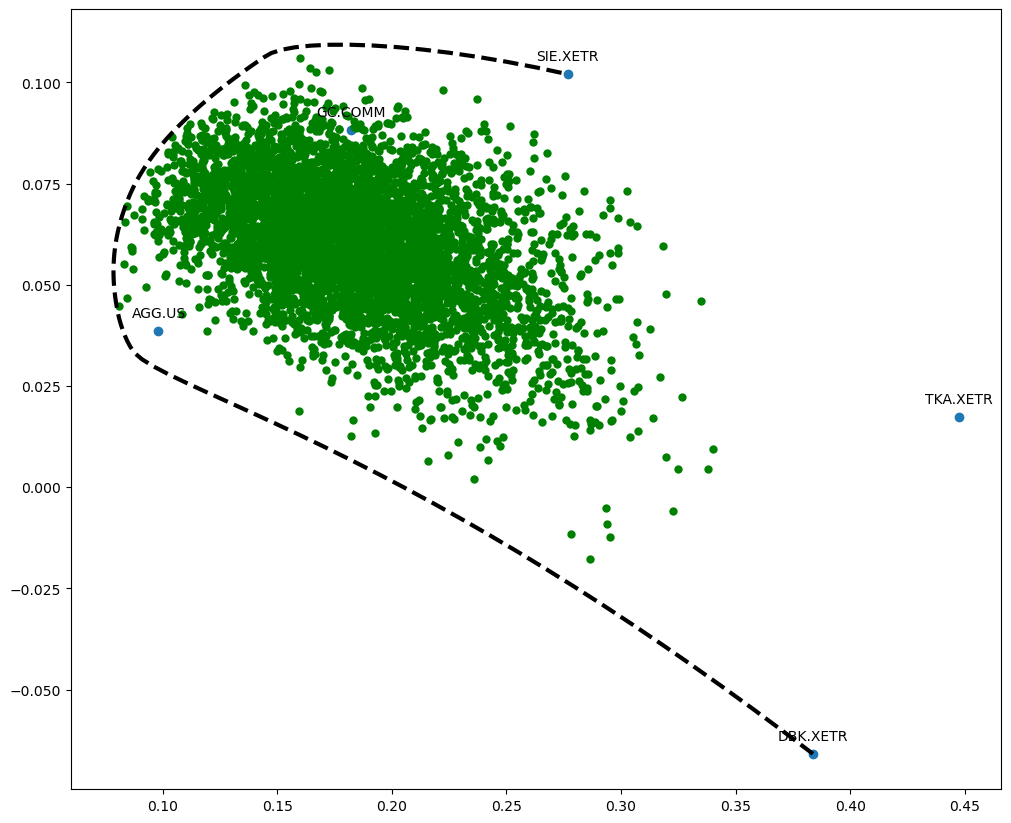

In [21]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
ok.Plots(ls5, ccy='EUR').plot_assets(kind='cagr')  # plot the assets points
ax = plt.gca()

ax.plot(ef.Risk, ef['CAGR'], color='black', linestyle='dashed', linewidth=3) # plot the Efficient Frontier

ax.scatter(mc.Risk, mc.CAGR, linewidth=0, color='green');  # plot the Monte Carlo simulation results